# Rigid Body Dynamics | Continuous Mass Distributions

[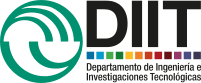](https://ingenieria.unlam.edu.ar/)    
[by-nc-sa_80x15.png](https://creativecommons.org/licenses/by-sa/4.0/deed.es_ES)
2025 [Víctor A. Bettachini](mailto:vbettachini@unlam.edu.ar)  

---

## Inertia Tensor for Point Masses

With the 2nd order tensor $I_{ik}$, we calculate $T = \frac{m}{2} \dot{\vec{R}}^2 + \frac{1}{2} I_{ik} \Omega_i \Omega_k$

$$
\overline{\overline{I}}
= I_{ik} =
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
=
\begin{pmatrix}
\sum_p m_p (y_p^2 + z_p^2) & - \sum_p m_p x_p y_p & - \sum_p m_p x_p z_p \\
- \sum_p m_p y_p x_p & \sum_p m_p (x_p^2 + z_p^2) & - \sum_p m_p y_p z_p \\
- \sum_p m_p z_p x_p & - \sum_p m_p z_p y_p & \sum_p m_p (x_p^2 + y_p^2) \\
\end{pmatrix}
$$

- The tensor $\overline{\overline{I}}$ is symmetric
- $I_{xx}, I_{yy}, I_{zz}$: **moments of inertia**, the others are **products of inertia**

## Inertia Tensor for Continuous Mass Distributions

In the inertia tensor $I_{ik}$, the summation over discrete mass positions is replaced by a continuous integration over the entire volume of the density as a function of position $\tilde{\rho}(\vec{r})$.

$$
I_{ik} = \iiint \tilde{\rho}(\vec{r}) \left[ x_l^2 \delta_{ik} -  x_i x_k \right] dV.
$$

$$
\overline{\overline{I}}
= I_{ik} = 
\begin{pmatrix}
I_{xx} & I_{xy} & I_{xz} \\
I_{yx} & I_{yy} & I_{yz} \\
I_{zx} & I_{zy} & I_{zz} \\
\end{pmatrix}
=
\begin{pmatrix}
\iiint \tilde{\rho}(\vec{r}) (y^2 + z^2) dV  &  - \iiint \tilde{\rho}(\vec{r}) x y dV  &  - \iiint \tilde{\rho}(\vec{r}) x z dV \\
- \iiint \tilde{\rho}(\vec{r}) y x dV  &  \iiint \tilde{\rho}(\vec{r}) (x^2 + z^2) dV  &  - \iiint \tilde{\rho}(\vec{r}) y z dV \\
- \iiint \tilde{\rho}(\vec{r}) z x dV  &  - \iiint \tilde{\rho}(\vec{r}) z y dV  &   \iiint \tilde{\rho}(\vec{r}) (x^2 + y^2) dV \\
\end{pmatrix}
$$

## Moments of Inertia of Simple Solids

Whenever you have to solve a problem, don't reinvent the wheel—use the results from below or from the

>**Reference**   
[List of 3D inertia tensors](https://en.wikipedia.org/wiki/List_of_moments_of_inertia#List_of_3D_inertia_tensors)  
Wikipedia  

### **Homogeneous cylinder**   

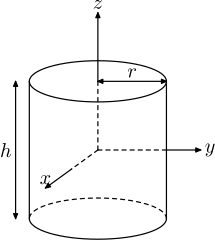

It is convenient to work using cylindrical coordinates, so $dV = \rho d\rho d\varphi dz$, since $\rho$ is the jacobian for this coordinate system.

If you have the density data of an object, you can calculate the inertia tensor of that object.
But usually you don't have the density data, rather you have the mass data from a weighing.
It then remains to calculate the density from the mass and volume.

In [1]:
import sympy as sm

In [3]:
ro, z, fi = sm.symbols('rho z varphi') # variables in a cylindrical coordinate system
r, h = sm.symbols('r h') # we define the symbols for density, radius of the base and height
jacobian_cylindrical = ro # jacobian for the transformation from cylindrical to cartesian

cylinder_volume = sm.Eq(
  sm.Symbol('Volume_{cylinder}'),
  sm.Integral(
    jacobian_cylindrical,
    (ro, 0, r), (fi, 0, 2 * sm.pi), (z, -h/2, h/2)
    )
)
cylinder_volume

Eq(Volume_{cylinder}, Integral(rho, (rho, 0, r), (varphi, 0, 2*pi), (z, -h/2, h/2)))

In [4]:
cylinder_volume.doit()

Eq(Volume_{cylinder}, pi*h*r**2)

We will call the density $\tilde{\rho}$ to avoid confusion with the radial coordinate $\rho$.

In [5]:
m = sm.Symbol('m') # we define the symbol for mass
cylinder_density = sm.Eq(
  sm.Symbol(r'\tilde{\rho}_{cylinder}'),
  m/ cylinder_volume.rhs.doit()
)
cylinder_density

Eq(\tilde{\rho}_{cylinder}, m/(pi*h*r**2))

We recall the expression for the elements of the inertia tensor for a continuous system.

$$
I_{ik} = \iiint \tilde{\rho}(\vec{r}) \left[ x_l^2 \delta_{ik} -  x_i x_k \right] dV .
$$

To calculate $I_{zz}$, the moment of inertia on $\hat{z}$, we have $i=z$ and $k=z$

$$
\begin{aligned}
I{zz} 
&= \iiint \tilde{\rho}(\vec{r}) \left[ x^2 + y^2 + z^2 - zz \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ x^2 + y^2 \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \left(\rho^2 \cos^2{\varphi} \right) + \left(\rho^2 \sin^2{\varphi} \right) \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \rho^2 \left( \cos^2{\varphi} + \sin^2{\varphi} \right) \right] dV \\
&= \iiint \tilde{\rho}(\vec{r}) \left[ \rho^2 \right] dV \\
&= \int_{-h/2}^{h/2} \int_0^{2\pi} \int_0^R \tilde{\rho}(\vec{r}) \left[ \rho^2 \right] \rho d\rho  d\varphi  dz .
\end{aligned}
$$

To determine $\left[ x_l^2 \delta_{ik} - x_i x_k \right]$ it is not necessary to recalculate it each time.
It suffices to refer to the expression of the inertia tensor $\overline{\overline{I}}$ already seen, where for $I_{zz}$ it corresponds

$$
x^2 + y^2 = \rho^2 (\cos^2{\varphi} + \sin^2{\varphi}) = \rho^2
$$

In [6]:
ro_density = sm.Symbol(r'\tilde{\rho}_{cylinder}')
cylinder_Izz = sm.Eq(
  sm.Symbol('I_{zz}'),
  sm.Integral(
    cylinder_density.lhs * ro**2 * jacobian_cylindrical,
    (ro, 0, r), (fi, 0, 2* sm.pi), (z, -h/2, h/2)
  )
)
cylinder_Izz

Eq(I_{zz}, Integral(\tilde{\rho}_{cylinder}*rho**3, (rho, 0, r), (varphi, 0, 2*pi), (z, -h/2, h/2)))

In [7]:
cylinder_Izz.doit()

Eq(I_{zz}, pi*\tilde{\rho}_{cylinder}*h*r**4/2)

This cylinder has homogeneous density, that is, it does not depend on position $\tilde{\rho}(\vec{r}) = \tilde{\rho}$.
And now this expression for density can be substituted into the moment of inertia to obtain the expression that will be used.

In [8]:
cylinder_Izz.doit().subs(cylinder_density.lhs, cylinder_density.rhs).simplify()

Eq(I_{zz}, m*r**2/2)

For calculating $I_{yy}$ (which is equal to $I_{xx}$) we have to integrate $[x^2 + z^2]$

$$
x^2 + z^2 = \rho^2 \cos^2{\varphi} + z^2
$$

In [9]:
Iyy = sm.Eq(
  sm.Symbol('I_{yy}'),
  sm.Integral(
    jacobian_cylindrical* ro_density* (ro**2* sm.cos(fi)**2 + z**2),
    (ro, 0, r), (fi, 0, 2* sm.pi), (z, -h/2, h/2)
  )
)
Iyy

Eq(I_{yy}, Integral(\tilde{\rho}_{cylinder}*rho*(rho**2*cos(varphi)**2 + z**2), (rho, 0, r), (varphi, 0, 2*pi), (z, -h/2, h/2)))

In [10]:
Iyy.subs(ro_density, cylinder_density.rhs)

Eq(I_{yy}, Integral(m*rho*(rho**2*cos(varphi)**2 + z**2)/(pi*h*r**2), (rho, 0, r), (varphi, 0, 2*pi), (z, -h/2, h/2)))

In [11]:
Iyy.subs(ro_density, cylinder_density.rhs).doit()

Eq(I_{yy}, h**2*m/12 + m*r**2/4)

### **Rod** rotating around its center  

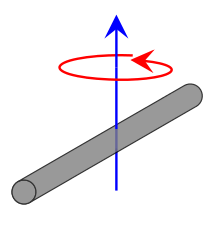

Cylinder with $r \ll l$ rotating about an axis perpendicular to its length $l$ passing through the center.   
If its mass is $m$, its density is $\tilde{\rho} = \frac{m}{l}$.

Axis $\hat{z}$ is along $l$ and $r \ll l \implies x, y \simeq 0$    
$$
I_{xx} = I_{yy} = \int_{l/2}^{l/2} \frac{m}{l} \left(z^2 \right) dz = \frac{m}{l} \frac{z^3}{3}\bigg\rvert_{l/2}^{l/2} = \frac{m l^2}{12} \quad I_{zz}= 0
$$


### **Rod** rotating from one end   

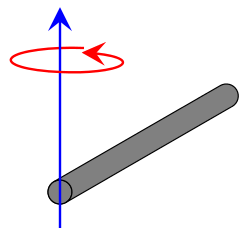

The parallel axis theorem allows calculating rotations around axes parallel to those passing through the center of mass by simply adding
$$
M r^2
$$
where $M$ is the mass of the system and $r$ is the distance between both axes.  

For the rod rotating around one end

$$
I_{xx} = I_{yy} = I_{xx, \mathrm{center\,of\,mass}} + m \left(\frac{l}{2}\right)^2 =  m l^2 \left( \frac{1}{12} + \frac{1}{4} \right) =  \frac{m l^2}{3}
$$

### **Empty spherical shell**

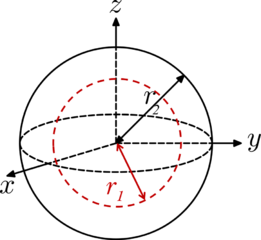

For any material body whose mass, $m$, we know, we still need to know the volume in which it is distributed. To calculate the volume of a sphere by integration, it is simpler to use spherical coordinates. The radial coordinate $\rho$ is complemented by the azimuthal angle, in the $x,y$ plane in the cartesian system, and $\theta$ the polar coordinate that starts from the $\hat{z}$ axis of the cartesian system. The Jacobian in this system is $\rho^2 \sin(\varphi)$.

In [13]:
ro, fi, zeta = sm.symbols(r'\rho \varphi theta') # spherical coordinate system
jacobian_spherical = ro**2 * sm.sin(zeta)

sphere_volume = sm.Eq(
  sm.Symbol('Volume_{sphere}'),
  sm.Integral(
    jacobian_spherical,
    (ro, 0, r), (zeta, 0, sm.pi), (fi, 0, 2* sm.pi)
    )
)
sphere_volume

Eq(Volume_{sphere}, Integral(\rho**2*sin(theta), (\rho, 0, r), (theta, 0, pi), (\varphi, 0, 2*pi)))

In [15]:
exterior_sphere_volume = sphere_volume.subs(r, sm.Symbol('r_2')).doit() # we define the symbol for the radius of the sphere
exterior_sphere_volume

Eq(Volume_{sphere}, 4*pi*r_2**3/3)

In this spherical shell $r_1<r_2$.

In [16]:
shell_volume = sm.Eq(
  sm.Symbol('Volume_{shell}'),
  exterior_sphere_volume.rhs - sphere_volume.subs(r, sm.Symbol('r_1')).doit().rhs
)
shell_volume.simplify()

Eq(Volume_{shell}, 4*pi*(-r_1**3 + r_2**3)/3)

The density is

In [17]:
m = sm.Symbol('m') # we define the symbol for the mass
shell_density = sm.Eq(
  sm.Symbol(r'\tilde{\rho}_{shell}'),
  m/ shell_volume.rhs.doit().simplify()
)
shell_density

Eq(\tilde{\rho}_{shell}, 3*m/(4*pi*(-r_1**3 + r_2**3)))

Due to its symmetry, the spherical shell has the same moment of inertia about the $x$ and $y$ axes, so we will only calculate the moment of inertia about the $z$ axis.

For this, we recall that $x^2 + y^2 = \rho^2 (\cos^2{\varphi} + \sin^2{\varphi}) = \rho^2$


In [18]:
r1, r2 = sm.symbols('r_1 r_2') # we define the symbols for the radii
Izz = sm.Eq(
  sm.Symbol('I_{zz}'),
  sm.Integral(
    jacobian_spherical * shell_density.lhs* ro**2,
    (ro, r1, r2), (zeta, 0, sm.pi), (fi, 0, 2* sm.pi)
  )
)
Izz

Eq(I_{zz}, Integral(\rho**4*\tilde{\rho}_{shell}*sin(theta), (\rho, r_1, r_2), (theta, 0, pi), (\varphi, 0, 2*pi)))

In [19]:
Izz.doit().simplify()

Eq(I_{zz}, 4*pi*\tilde{\rho}_{shell}*(-r_1**5 + r_2**5)/5)

In [20]:
Izz.doit().subs(shell_density.lhs, shell_density.rhs).simplify()

Eq(I_{zz}, 3*m*(r_1**5 - r_2**5)/(5*(r_1**3 - r_2**3)))